In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")
%matplotlib inline
import numpy as np
from scipy import stats
import pandas as pd
from math import sqrt, log, exp, pi
from random import uniform

Jepni vleren per Mean1: f
Jepni vleren per Standard_dev1: f
Jepni vleren per Mean2: f
Jepni vleren per Standard_dev2: f
Duhet te jepni vetem numra float ose integer!
Jepni vleren per Mean1: 3
Jepni vleren per Standard_dev1: 3
Jepni vleren per Mean2: 3
Jepni vleren per Standard_dev2: 2
Input Gaussian 1: μ = 3.0, σ = 3.0
Input Gaussian 2: μ = 3.0, σ = 2.0
[1.98404919 2.23279135 3.15343843 ... 1.19312262 0.23503106 1.93138823]


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


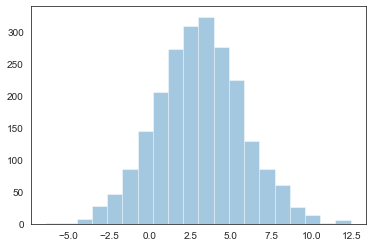

In [3]:
random_seed=36788765
np.random.seed(random_seed)

M1 = input('Jepni vleren per Mean1: ')  
S1 = input('Jepni vleren per Standard_dev1: ')
M2 = input('Jepni vleren per Mean2: ') 
S2 = input('Jepni vleren per Standard_dev2: ')

if isinstance(M1, str) or isinstance(S1, str) or isinstance(M2, str) or isinstance(S2, str):
    print("Duhet te jepni vetem numra float ose integer!")
    M1 = input('Jepni vleren per Mean1: ')  
    S1 = input('Jepni vleren per Standard_dev1: ')
    M2 = input('Jepni vleren per Mean2: ') 
    S2 = input('Jepni vleren per Standard_dev2: ')

Mean1 = float(M1)
Standard_dev1=float(S1)
Mean2=float(M2)
Standard_dev2=float(S2)

y1 = np.random.normal(Mean1, Standard_dev1, 1500)
y2 = np.random.normal(Mean2, Standard_dev2, 750)
data=np.append(y1,y2)


Min_graph = min(data)
Max_graph = max(data)
x = np.linspace(Min_graph, Max_graph, 2000) 

print('Input Gaussian {:}: μ = {:.2}, σ = {:.2}'.format("1", Mean1, Standard_dev1))
print('Input Gaussian {:}: μ = {:.2}, σ = {:.2}'.format("2", Mean2, Standard_dev2))
sns.distplot(data, bins=20, kde=False);
print(data)

In [4]:
class Gaussian:

    def __init__(self, mu, sigma):
        
        self.mu = mu
        self.sigma = sigma

    def pdf(self, datum):

        u = (datum - self.mu) / abs(self.sigma)
        y = (1 / (sqrt(2 * pi) * abs(self.sigma))) * exp(-u * u / 2)
        return y
    
    def __repr__(self):
        return 'Gaussian({0:4.6}, {1:4.6})'.format(self.mu, self.sigma)
    

Single Gaussian me i mire: μ = 3.1, σ = 2.7


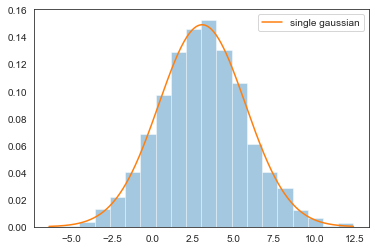

In [5]:
best_single = Gaussian(np.mean(data), np.std(data))
print('Single Gaussian me i mire: μ = {:.2}, σ = {:.2}'.format(best_single.mu, best_single.sigma))

g_single = stats.norm(best_single.mu, best_single.sigma).pdf(x)
sns.distplot(data, bins=20, kde=False, norm_hist=True);
plt.plot(x, g_single, label='single gaussian');
plt.legend();

In [6]:
class GaussianMixture_self:

    def __init__(self, data, mu_min=min(data), mu_max=max(data), sigma_min=1, sigma_max=1, mix=.5):
        self.data = data
        
        self.one = Gaussian(uniform(mu_min, mu_max), 
                            uniform(sigma_min, sigma_max))
        self.two = Gaussian(uniform(mu_min, mu_max), 
                            uniform(sigma_min, sigma_max))
        
        self.mix = mix

    def Estep(self):

        self.loglike = 0.
        for datum in self.data:  

            wp1 = self.one.pdf(datum) * self.mix
            wp2 = self.two.pdf(datum) * (1. - self.mix)

            den = wp1 + wp2

            wp1 /= den   
            wp2 /= den     

            self.loglike += log(den)

            yield (wp1, wp2)

    def Mstep(self, weights):
     
        (left, rigt) = zip(*weights) 
        one_den = sum(left)
        two_den = sum(rigt)

        self.one.mu = sum(w * d  for (w, d) in zip(left, data)) / one_den
        self.two.mu = sum(w * d  for (w, d) in zip(rigt, data)) / two_den
        
        self.one.sigma = sqrt(sum(w * ((d - self.one.mu) ** 2)
                                  for (w, d) in zip(left, data)) / one_den)
        self.two.sigma = sqrt(sum(w * ((d - self.two.mu) ** 2)
                                  for (w, d) in zip(rigt, data)) / two_den)
 
        self.mix = one_den / len(data)

        
    def iterate(self, N=1, verbose=False):

        for i in range(1, N+1):
            self.Mstep(self.Estep())
            if verbose:
                print('{0:2} {1}'.format(i, self))
        self.Estep() 

    def pdf(self, x):
        return (self.mix)*self.one.pdf(x) + (1-self.mix)*self.two.pdf(x)
    def __repr__(self):
        return 'GaussianMixture({0}, {1}, mix={2.03})'.format(self.one, 
                                                              self.two, 
                                                              self.mix)

    def __str__(self):
        return 'Mixture: {0}, {1}, mix={2:.03})'.format(self.one, 
                                                        self.two, 
                                                        self.mix)

In [7]:
n_iterations = 20
best_mix = None
best_loglike = float('-inf')
mix = GaussianMixture_self(data)
for _ in range(n_iterations):
    try:

        mix.iterate(verbose=True)
        if mix.loglike > best_loglike:
            best_loglike = mix.loglike
            best_mix = mix
        
    except (ZeroDivisionError, ValueError, RuntimeWarning): 
        print("one less")
        pass

 1 Mixture: Gaussian(5.54323, 1.61508), Gaussian(1.30836, 1.72318), mix=0.414)
 1 Mixture: Gaussian(5.37394, 1.81703), Gaussian(1.45993, 1.89262), mix=0.409)
 1 Mixture: Gaussian(5.25805, 1.93344), Gaussian(1.55668, 1.98809), mix=0.407)
 1 Mixture: Gaussian(5.17013, 2.01347), Gaussian(1.62793, 2.05225), mix=0.405)
 1 Mixture: Gaussian(5.09942, 2.07355), Gaussian(1.68427, 2.09945), mix=0.403)
 1 Mixture: Gaussian(5.04037, 2.12115), Gaussian(1.73079, 2.13617), mix=0.402)
 1 Mixture: Gaussian(4.98972, 2.16027), Gaussian(1.77037, 2.16584), mix=0.401)
 1 Mixture: Gaussian(4.94542, 2.1933), Gaussian(1.80477, 2.1905), mix=0.4)
 1 Mixture: Gaussian(4.90608, 2.22175), Gaussian(1.83516, 2.21144), mix=0.399)
 1 Mixture: Gaussian(4.87072, 2.24666), Gaussian(1.86238, 2.22951), mix=0.399)
 1 Mixture: Gaussian(4.83862, 2.26874), Gaussian(1.887, 2.24533), mix=0.398)
 1 Mixture: Gaussian(4.80924, 2.28854), Gaussian(1.90947, 2.25933), mix=0.397)
 1 Mixture: Gaussian(4.78216, 2.30644), Gaussian(1.93012, 

Llogaritja e modelit me te mire...

Input Gaussian 1: μ = 3.0, σ = 3.0
Input Gaussian 2: μ = 3.0, σ = 2.0
Gaussian 1: μ = 2.7, σ = 2.2, weight = 0.3
Gaussian 2: μ = 3.2, σ = 2.9, weight = 0.7


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


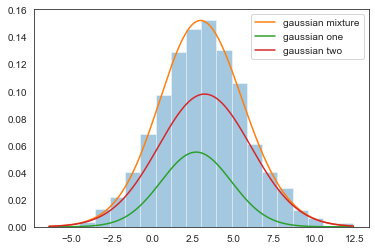

In [8]:
n_iterations = 300
n_random_restarts = 4
best_mix = None
best_loglike = float('-inf')
print('Llogaritja e modelit me te mire...\n')
for _ in range(n_random_restarts):
    mix = GaussianMixture_self(data)
    for _ in range(n_iterations):
        try:
            mix.iterate()
            if mix.loglike > best_loglike:
                best_loglike = mix.loglike
                best_mix = mix
        except (ZeroDivisionError, ValueError, RuntimeWarning):
            pass

print('Input Gaussian {:}: μ = {:.2}, σ = {:.2}'.format("1", Mean1, Standard_dev1))
print('Input Gaussian {:}: μ = {:.2}, σ = {:.2}'.format("2", Mean2, Standard_dev2))
print('Gaussian {:}: μ = {:.2}, σ = {:.2}, weight = {:.2}'.format("1", best_mix.one.mu, best_mix.one.sigma, best_mix.mix))
print('Gaussian {:}: μ = {:.2}, σ = {:.2}, weight = {:.2}'.format("2", best_mix.two.mu, best_mix.two.sigma, (1-best_mix.mix)))

sns.distplot(data, bins=20, kde=False, norm_hist=True);
g_both = [best_mix.pdf(e) for e in x]
plt.plot(x, g_both, label='gaussian mixture');
g_left = [best_mix.one.pdf(e) * best_mix.mix for e in x]
plt.plot(x, g_left, label='gaussian one');
g_right = [best_mix.two.pdf(e) * (1-best_mix.mix) for e in x]
plt.plot(x, g_right, label='gaussian two');
plt.legend();